In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io
import skimage.transform
import urllib
import requests
from io import BytesIO

import flickrapi

api_key = '134871c5bf05982504099e45035e58b3'
api_secret = '657d30d0e6253fa8'

flickr = flickrapi.FlickrAPI(api_key,api_secret)

keyword1 = 'car'
keyword2 = 'bicycle'

carphotos = flickr.walk(text=keyword1, tag_mode='all', tags=keyword1,extras='url_c', sort='relevance',per_page=100)
bicyclephotos = flickr.walk(text=keyword2, tag_mode='all', tags=keyword2,extras='url_c', sort='relevance',per_page=100)

In [13]:
import os

# declare directory names
train_dir = 'train'
test_dir = 'test'
image_dir1 = keyword1
image_dir2 = keyword2

# make a directories for the training and testing images
for root_dir in [train_dir,test_dir]:
    dir_path = root_dir + '/' + image_dir1

    # check if data exists
    if not os.path.isdir(root_dir):
        os.mkdir(root_dir)
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path)
        print("Making directory %s" % dir_path)
    else:
        print("Will store %s images in directory %s" %(root_dir,dir_path))
        
for root_dir in [train_dir,test_dir]:
    dir_path = root_dir + '/' + image_dir2

    # check if data exists
    if not os.path.isdir(root_dir):
        os.mkdir(root_dir)
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path)
        print("Making directory %s" % dir_path)
    else:
        print("Will store %s images in directory %s" %(root_dir,dir_path))

Will store train images in directory train/car
Will store test images in directory test/car
Will store train images in directory train/bicycle
Will store test images in directory test/bicycle


In [14]:
import warnings
from random import seed
from random import random
    
ntrain = 1000 # number of training images to download
ntest = 300 # number of testing images to download

nrow = 224 # image dimension 1
ncol = 224 # image dimension 2

# download images, first train then test
seed(1) # make repeatable
itrain = 0 # initialize counter
itest = 0 # initialize counter
for photo in carphotos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Set the directory randomly 
        #if (random()< ntrain/(ntrain+ntest)):
        if (random()< (ntrain-itrain)/(ntrain-itrain + ntest-itest + 1e-15)):
            if (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir1
                i = itrain
                itrain = itrain + 1
            elif (itest<ntest):
                dir_path = test_dir + '/' + image_dir1
                i = itest
                itest = itest + 1
            else:
                break
        else:
            if (itest<ntest):
                dir_path = test_dir + '/' + image_dir1
                i = itest
                itest = itest + 1
            elif (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir1
                i = itrain
                itrain = itrain + 1
            else:
                break            
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_path,keyword1,i)  
        skimage.io.imsave(local_name, im2)

train/car/car_0000.jpg
test/car/car_0000.jpg
train/car/car_0001.jpg
train/car/car_0002.jpg
train/car/car_0003.jpg
train/car/car_0004.jpg
train/car/car_0005.jpg
test/car/car_0001.jpg
train/car/car_0006.jpg
train/car/car_0007.jpg
test/car/car_0002.jpg
train/car/car_0008.jpg
train/car/car_0009.jpg
train/car/car_0010.jpg
train/car/car_0011.jpg
train/car/car_0012.jpg
train/car/car_0013.jpg
test/car/car_0003.jpg
test/car/car_0004.jpg
train/car/car_0014.jpg
train/car/car_0015.jpg
train/car/car_0016.jpg
test/car/car_0005.jpg
train/car/car_0017.jpg
train/car/car_0018.jpg
train/car/car_0019.jpg
train/car/car_0020.jpg
train/car/car_0021.jpg
train/car/car_0022.jpg
train/car/car_0023.jpg
train/car/car_0024.jpg
train/car/car_0025.jpg
train/car/car_0026.jpg
train/car/car_0027.jpg
train/car/car_0028.jpg
train/car/car_0029.jpg
test/car/car_0006.jpg
train/car/car_0030.jpg
train/car/car_0031.jpg
train/car/car_0032.jpg
test/car/car_0007.jpg
test/car/car_0008.jpg
train/car/car_0033.jpg
train/car/car_0034.j

train/car/car_0268.jpg
train/car/car_0269.jpg
train/car/car_0270.jpg
test/car/car_0093.jpg
test/car/car_0094.jpg
train/car/car_0271.jpg
train/car/car_0272.jpg
test/car/car_0095.jpg
train/car/car_0273.jpg
train/car/car_0274.jpg
train/car/car_0275.jpg
train/car/car_0276.jpg
train/car/car_0277.jpg
train/car/car_0278.jpg
train/car/car_0279.jpg
train/car/car_0280.jpg
train/car/car_0281.jpg
train/car/car_0282.jpg
train/car/car_0283.jpg
train/car/car_0284.jpg
train/car/car_0285.jpg
test/car/car_0096.jpg
train/car/car_0286.jpg
train/car/car_0287.jpg
train/car/car_0288.jpg
train/car/car_0289.jpg
train/car/car_0290.jpg
train/car/car_0291.jpg
train/car/car_0292.jpg
train/car/car_0293.jpg
train/car/car_0294.jpg
train/car/car_0295.jpg
train/car/car_0296.jpg
train/car/car_0297.jpg
train/car/car_0298.jpg
train/car/car_0299.jpg
train/car/car_0300.jpg
train/car/car_0301.jpg
train/car/car_0302.jpg
test/car/car_0097.jpg
test/car/car_0098.jpg
train/car/car_0303.jpg
train/car/car_0304.jpg
train/car/car_030

test/car/car_0170.jpg
test/car/car_0171.jpg
train/car/car_0552.jpg
train/car/car_0553.jpg
test/car/car_0172.jpg
train/car/car_0554.jpg
train/car/car_0555.jpg
test/car/car_0173.jpg
train/car/car_0556.jpg
train/car/car_0557.jpg
train/car/car_0558.jpg
train/car/car_0559.jpg
train/car/car_0560.jpg
train/car/car_0561.jpg
test/car/car_0174.jpg
train/car/car_0562.jpg
train/car/car_0563.jpg
train/car/car_0564.jpg
test/car/car_0175.jpg
train/car/car_0565.jpg
train/car/car_0566.jpg
train/car/car_0567.jpg
train/car/car_0568.jpg
train/car/car_0569.jpg
train/car/car_0570.jpg
test/car/car_0176.jpg
test/car/car_0177.jpg
test/car/car_0178.jpg
train/car/car_0571.jpg
train/car/car_0572.jpg
train/car/car_0573.jpg
train/car/car_0574.jpg
train/car/car_0575.jpg
train/car/car_0576.jpg
test/car/car_0179.jpg
test/car/car_0180.jpg
train/car/car_0577.jpg
train/car/car_0578.jpg
train/car/car_0579.jpg
train/car/car_0580.jpg
test/car/car_0181.jpg
train/car/car_0581.jpg
test/car/car_0182.jpg
train/car/car_0582.jpg
t

test/car/car_0252.jpg
train/car/car_0830.jpg
test/car/car_0253.jpg
train/car/car_0831.jpg
train/car/car_0832.jpg
train/car/car_0833.jpg
train/car/car_0834.jpg
train/car/car_0835.jpg
train/car/car_0836.jpg
train/car/car_0837.jpg
test/car/car_0254.jpg
train/car/car_0838.jpg
train/car/car_0839.jpg
train/car/car_0840.jpg
train/car/car_0841.jpg
train/car/car_0842.jpg
train/car/car_0843.jpg
train/car/car_0844.jpg
train/car/car_0845.jpg
train/car/car_0846.jpg
train/car/car_0847.jpg
train/car/car_0848.jpg
train/car/car_0849.jpg
train/car/car_0850.jpg
train/car/car_0851.jpg
train/car/car_0852.jpg
train/car/car_0853.jpg
train/car/car_0854.jpg
train/car/car_0855.jpg
test/car/car_0255.jpg
train/car/car_0856.jpg
train/car/car_0857.jpg
train/car/car_0858.jpg
train/car/car_0859.jpg
train/car/car_0860.jpg
train/car/car_0861.jpg
test/car/car_0256.jpg
train/car/car_0862.jpg
test/car/car_0257.jpg
train/car/car_0863.jpg
test/car/car_0258.jpg
test/car/car_0259.jpg
train/car/car_0864.jpg
test/car/car_0260.j

NameError: name 'keyword12' is not defined

In [15]:
seed(1) # make repeatable
itrain = 0 # initialize counter
itest = 0 # initialize counter
for photo in bicyclephotos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Set the directory randomly 
        #if (random()< ntrain/(ntrain+ntest)):
        if (random()< (ntrain-itrain)/(ntrain-itrain + ntest-itest + 1e-15)):
            if (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir2
                i = itrain
                itrain = itrain + 1
            elif (itest<ntest):
                dir_path = test_dir + '/' + image_dir2
                i = itest
                itest = itest + 1
            else:
                break
        else:
            if (itest<ntest):
                dir_path = test_dir + '/' + image_dir2
                i = itest
                itest = itest + 1
            elif (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir2
                i = itrain
                itrain = itrain + 1
            else:
                break            
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_path,keyword2,i)  
        skimage.io.imsave(local_name, im2)      
        print(local_name)

train/bicycle/bicycle_0000.jpg
test/bicycle/bicycle_0000.jpg
train/bicycle/bicycle_0001.jpg
train/bicycle/bicycle_0002.jpg
train/bicycle/bicycle_0003.jpg
train/bicycle/bicycle_0004.jpg
train/bicycle/bicycle_0005.jpg
test/bicycle/bicycle_0001.jpg
train/bicycle/bicycle_0006.jpg
train/bicycle/bicycle_0007.jpg
test/bicycle/bicycle_0002.jpg
train/bicycle/bicycle_0008.jpg
train/bicycle/bicycle_0009.jpg
train/bicycle/bicycle_0010.jpg
train/bicycle/bicycle_0011.jpg
train/bicycle/bicycle_0012.jpg
train/bicycle/bicycle_0013.jpg
test/bicycle/bicycle_0003.jpg
test/bicycle/bicycle_0004.jpg
train/bicycle/bicycle_0014.jpg
train/bicycle/bicycle_0015.jpg
train/bicycle/bicycle_0016.jpg
test/bicycle/bicycle_0005.jpg
train/bicycle/bicycle_0017.jpg
train/bicycle/bicycle_0018.jpg
train/bicycle/bicycle_0019.jpg
train/bicycle/bicycle_0020.jpg
train/bicycle/bicycle_0021.jpg
train/bicycle/bicycle_0022.jpg
train/bicycle/bicycle_0023.jpg
train/bicycle/bicycle_0024.jpg
train/bicycle/bicycle_0025.jpg
train/bicycle/

train/bicycle/bicycle_0200.jpg
train/bicycle/bicycle_0201.jpg
train/bicycle/bicycle_0202.jpg
train/bicycle/bicycle_0203.jpg
test/bicycle/bicycle_0067.jpg
train/bicycle/bicycle_0204.jpg
test/bicycle/bicycle_0068.jpg
test/bicycle/bicycle_0069.jpg
train/bicycle/bicycle_0205.jpg
train/bicycle/bicycle_0206.jpg
train/bicycle/bicycle_0207.jpg
train/bicycle/bicycle_0208.jpg
train/bicycle/bicycle_0209.jpg
train/bicycle/bicycle_0210.jpg
train/bicycle/bicycle_0211.jpg
test/bicycle/bicycle_0070.jpg
train/bicycle/bicycle_0212.jpg
train/bicycle/bicycle_0213.jpg
train/bicycle/bicycle_0214.jpg
train/bicycle/bicycle_0215.jpg
train/bicycle/bicycle_0216.jpg
test/bicycle/bicycle_0071.jpg
test/bicycle/bicycle_0072.jpg
test/bicycle/bicycle_0073.jpg
train/bicycle/bicycle_0217.jpg
train/bicycle/bicycle_0218.jpg
train/bicycle/bicycle_0219.jpg
test/bicycle/bicycle_0074.jpg
train/bicycle/bicycle_0220.jpg
train/bicycle/bicycle_0221.jpg
train/bicycle/bicycle_0222.jpg
train/bicycle/bicycle_0223.jpg
train/bicycle/bi

train/bicycle/bicycle_0405.jpg
test/bicycle/bicycle_0129.jpg
train/bicycle/bicycle_0406.jpg
train/bicycle/bicycle_0407.jpg
test/bicycle/bicycle_0130.jpg
train/bicycle/bicycle_0408.jpg
train/bicycle/bicycle_0409.jpg
train/bicycle/bicycle_0410.jpg
train/bicycle/bicycle_0411.jpg
train/bicycle/bicycle_0412.jpg
train/bicycle/bicycle_0413.jpg
train/bicycle/bicycle_0414.jpg
train/bicycle/bicycle_0415.jpg
train/bicycle/bicycle_0416.jpg
test/bicycle/bicycle_0131.jpg
test/bicycle/bicycle_0132.jpg
test/bicycle/bicycle_0133.jpg
train/bicycle/bicycle_0417.jpg
test/bicycle/bicycle_0134.jpg
train/bicycle/bicycle_0418.jpg
train/bicycle/bicycle_0419.jpg
train/bicycle/bicycle_0420.jpg
train/bicycle/bicycle_0421.jpg
test/bicycle/bicycle_0135.jpg
train/bicycle/bicycle_0422.jpg
train/bicycle/bicycle_0423.jpg
test/bicycle/bicycle_0136.jpg
train/bicycle/bicycle_0424.jpg
train/bicycle/bicycle_0425.jpg
train/bicycle/bicycle_0426.jpg
train/bicycle/bicycle_0427.jpg
train/bicycle/bicycle_0428.jpg
train/bicycle/bi

train/bicycle/bicycle_0606.jpg
train/bicycle/bicycle_0607.jpg
test/bicycle/bicycle_0195.jpg
train/bicycle/bicycle_0608.jpg
train/bicycle/bicycle_0609.jpg
train/bicycle/bicycle_0610.jpg
train/bicycle/bicycle_0611.jpg
test/bicycle/bicycle_0196.jpg
train/bicycle/bicycle_0612.jpg
train/bicycle/bicycle_0613.jpg
train/bicycle/bicycle_0614.jpg
test/bicycle/bicycle_0197.jpg
train/bicycle/bicycle_0615.jpg
train/bicycle/bicycle_0616.jpg
train/bicycle/bicycle_0617.jpg
train/bicycle/bicycle_0618.jpg
train/bicycle/bicycle_0619.jpg
test/bicycle/bicycle_0198.jpg
train/bicycle/bicycle_0620.jpg
train/bicycle/bicycle_0621.jpg
train/bicycle/bicycle_0622.jpg
train/bicycle/bicycle_0623.jpg
train/bicycle/bicycle_0624.jpg
train/bicycle/bicycle_0625.jpg
train/bicycle/bicycle_0626.jpg
train/bicycle/bicycle_0627.jpg
train/bicycle/bicycle_0628.jpg
train/bicycle/bicycle_0629.jpg
train/bicycle/bicycle_0630.jpg
train/bicycle/bicycle_0631.jpg
train/bicycle/bicycle_0632.jpg
test/bicycle/bicycle_0199.jpg
train/bicycle

train/bicycle/bicycle_0819.jpg
train/bicycle/bicycle_0820.jpg
train/bicycle/bicycle_0821.jpg
test/bicycle/bicycle_0249.jpg
train/bicycle/bicycle_0822.jpg
train/bicycle/bicycle_0823.jpg
train/bicycle/bicycle_0824.jpg
train/bicycle/bicycle_0825.jpg
train/bicycle/bicycle_0826.jpg
train/bicycle/bicycle_0827.jpg
test/bicycle/bicycle_0250.jpg
train/bicycle/bicycle_0828.jpg
test/bicycle/bicycle_0251.jpg
train/bicycle/bicycle_0829.jpg
test/bicycle/bicycle_0252.jpg
train/bicycle/bicycle_0830.jpg
test/bicycle/bicycle_0253.jpg
train/bicycle/bicycle_0831.jpg
train/bicycle/bicycle_0832.jpg
train/bicycle/bicycle_0833.jpg
train/bicycle/bicycle_0834.jpg
train/bicycle/bicycle_0835.jpg
train/bicycle/bicycle_0836.jpg
train/bicycle/bicycle_0837.jpg
test/bicycle/bicycle_0254.jpg
train/bicycle/bicycle_0838.jpg
train/bicycle/bicycle_0839.jpg
train/bicycle/bicycle_0840.jpg
train/bicycle/bicycle_0841.jpg
train/bicycle/bicycle_0842.jpg
train/bicycle/bicycle_0843.jpg
train/bicycle/bicycle_0844.jpg
train/bicycle/

Now we'll select the image dimensions for our neural network.  They need not be the same as those of the downloaded images, or even the 224x224 size that the network was optimized for, but they should be small enough to work on your machine without taking forever.  If you have a CPU machine, a good choice is 64 x 64. But if you have a GPU image, then you can use a larger image size, like 150 x 150.

In [17]:
nrow = 64
ncol = 64


from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# TODO
train_dir = './train'
data_transform = transforms.Compose([transforms.RandomResizedCrop((nrow,ncol), scale=(0.5,1)),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# TODO
train_ds = ImageFolder(train_dir, transform=data_transform)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

# Create data set using ImageFolder

Now, create a `test_dl` object for the test data, using the same data transform as for the training.

In [21]:
# TODO
test_ds = ImageFolder(test_dir, transform=data_transform)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True)

# Create test data loader similar to above

The following image display function will be useful later.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Code from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html #####
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0)) # rearrange dimensions from (color,y,x) -> (y,x,color)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean # undo the normalization
    inp = np.clip(inp, 0, 1)
    # Display image, without ticks
    plt.imshow(inp)
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)

###########################################################################################

To see how the `train_dl` works

torch.Size([32, 3, 64, 64]) torch.Size([32])


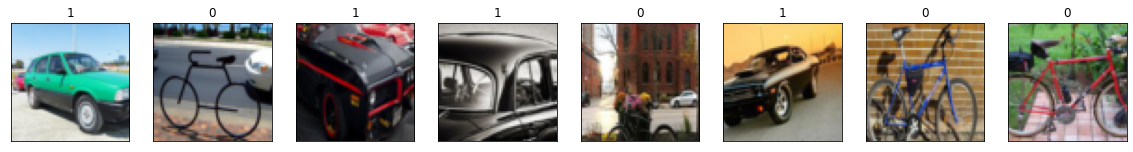

In [24]:
# TODO
X,y = next(iter(train_dl))
print(X.size(), y.size())
nplot = 8
plt.figure(figsize=(20,20))
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    imshow(X[i], title=str(int(y[i])))

## Loading a Pre-Trained Deep Network

In [29]:
import torch
from torchvision.models import vgg16

# TODO:  Load the VGG16 network
model = vgg16(pretrained=True)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Julian/.cache\torch\hub\checkpoints\vgg16-397923af.pth


In [31]:
for param in model.parameters():
    param.requires_grad = False


print(model.classifier[0])

Replace `model.classifier` with a neural network consisting of the following layers:
* Linear w/ 256 output channels
* ReLU
* Dropout w/ p = 0.5
* Linear w/ 1 output channel (indicating car vs bike)
* Sigmoid

This network can be constructed using 1 line via `nn.Sequential`.

In [37]:
import torch.nn as nn

# TODO Replace the classifier part of the network
model.classifier = nn.Sequential(nn.Linear(25088,256), nn.ReLU(), nn.Dropout(p=0.5), nn.Linear(256,1), nn.Sigmoid())


Now we will print a summary of the model.

In [38]:
print(str(model))

import torch.optim as optim

lr = 1e-3

# loss and optimizer
criterion = nn.BCELoss()
opt = torch.optim.Adam(model.parameters(),lr=lr)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Now, run the training.  If you are using a CPU on a regular laptop, each epoch should take about 1-4 minutes, so you should be able to finish 5 epochs or so within 5-20 minutes.  On a reasonable GPU, even with 150 x 150 images, it should take about 10 seconds per epoch.  If you use `(nrow,ncol) = (64,64)` images, you should get about 90-95% accuracy after 5 epochs.

In [40]:
import time

num_epoch = 5

a_tr_loss = np.zeros([num_epoch])
a_tr_accuracy = np.zeros([num_epoch])
a_ts_loss = np.zeros([num_epoch])
a_ts_accuracy = np.zeros([num_epoch])

for epoch in range(num_epoch):
    correct = 0
    total = 0
    batch_loss = []
    tic = time.time()
    model.train()
    for train_iter, data in enumerate(train_dl):
        x_batch,y_batch = data
        y_batch = y_batch.view(-1,1)
        out = model(x_batch)
        
        # Loss
        
        loss = criterion(out,y_batch.type(torch.float))
        batch_loss.append(loss.item())
        
        # Zero gradients
        
        opt.zero_grad()
        
        # back propagation
        
        loss.backward()
        
        # optimiation steps
        
        opt.step()
        
        predicted = out.clamp(0,1).round().type(torch.long)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        
    a_tr_loss[epoch] = np.mean(batch_loss)
    a_tr_accuracy[epoch] = 100*correct/total
    
    correct = 0
    total = 0
    batch_loss = []
    model.eval()
    with torch.no_grad():
        for data in test_dl:
            images, labels = data
            labels = labels.view(-1,1)
            out = model(images)
            batch_loss.append(criterion(out,labels.type(torch.float)).item())
            predicted = out.clamp(0,1).round().type(torch.long)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    a_ts_loss[epoch] = np.mean(batch_loss)
    a_ts_accuracy[epoch] = 100*correct/total
    elapsed = time.time()-tic
    
    print('Epoch: {0:2d}   Train Loss: {1:.3f}   '.format(epoch+1, a_tr_loss[epoch]) + 'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[epoch], a_ts_loss[epoch]) + 'Test Accuracy: {0:.2f}   '.format(a_ts_accuracy[epoch]) + 'Time: {0:.2f}sec'.format(elapsed))


Epoch:  1   Train Loss: 0.539   Train Accuracy: 95.25    Test Loss: 1.008   Test Accuracy: 95.17   Time: 35.51sec
Epoch:  2   Train Loss: 0.423   Train Accuracy: 97.15    Test Loss: 0.182   Test Accuracy: 96.67   Time: 26.55sec
Epoch:  3   Train Loss: 0.311   Train Accuracy: 97.05    Test Loss: 0.137   Test Accuracy: 97.00   Time: 30.13sec
Epoch:  4   Train Loss: 0.083   Train Accuracy: 98.10    Test Loss: 0.130   Test Accuracy: 97.00   Time: 31.32sec
Epoch:  5   Train Loss: 0.072   Train Accuracy: 98.20    Test Loss: 0.107   Test Accuracy: 98.17   Time: 28.91sec


Finally, show some example test images with their predicted and actual labels in the title.

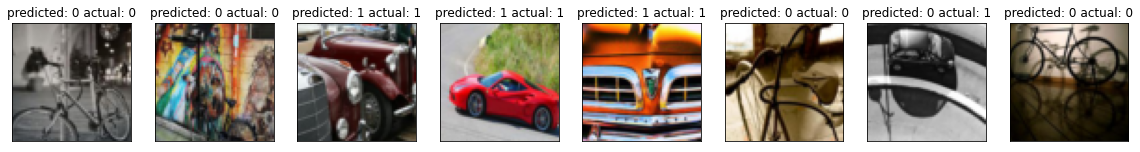

In [46]:
n_show = 8
# TODO
view_dl = DataLoader(test_ds, batch_size=1, shuffle=True)
plt.figure(figsize=(20,20))

with torch.no_grad():
    for i, data in enumerate(view_dl):
        if i>= n_show:
            break
        images, labels = data
        out = model(images)
        predicted = str(int(out.clamp(0,1).round()))
        plt.subplot(1, n_show, i+1)
        imshow(images[0], title='predicted: ' + predicted + ' actual: ' + str(int(labels[0])))